In [1]:
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import substring 
from car_schema import *

sprk_session = SparkSession.builder.master("local[1]") \
                        .appName('SparkByExamples.com') \
                        .getOrCreate()

24/01/28 16:25:44 WARN Utils: Your hostname, chema-BOHK-WAX9X resolves to a loopback address: 127.0.1.1; using 192.168.1.189 instead (on interface wlp2s0)
24/01/28 16:25:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/28 16:25:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Take a sample
df_price = sprk_session.read.csv('car_tables/Price_table.csv', header=True, schema=schema_price)
pd_df = df_price.sample(0.3, 4).toPandas()

df_price.printSchema()

root
 |-- Maker: string (nullable = true)
 |-- Genmodel: string (nullable = true)
 |-- Genmodel_ID: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Entry_Price: integer (nullable = true)



Entry price skewness  3.998993504083825


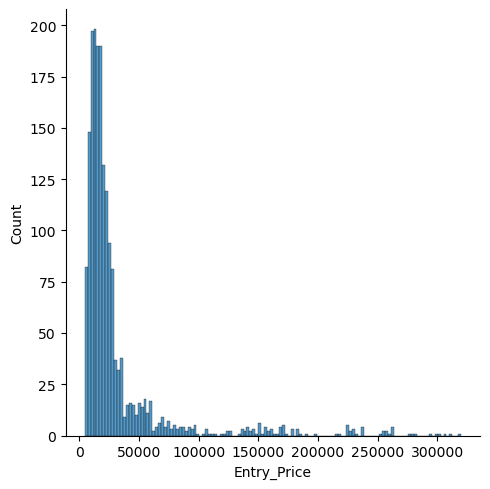

In [3]:
print('Entry price skewness ', df_price.agg({'Entry_Price':'skewness'}).collect()[0][0])
sns.displot(pd_df, x='Entry_Price')

There are outliers derived from very expensive cars, and the distribution is heavily skewed

24/01/28 16:26:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Maker, Genmodel, Genmodel_ID, Adv_ID, Adv_year, Adv_month, Color, Reg_year, Bodytype, Runned_Miles, Engin_size, Gearbox, Fuel_type, Price, Seat_num, Door_num
 Schema: Adv_Maker, Adv_Genmodel, Adv_Genmodel_ID, Adv_ID, Adv_year, Adv_month, Color, Reg_year, Bodytype, Runned_Miles, Engin_size, Gearbox, Fuel_type, Price, Seat_num, Door_num
Expected: Adv_Maker but found: Maker
CSV file: file:///home/chema/Documentos/GitHub/Spark/car_tables/Ad_table.csv


<AxesSubplot:>

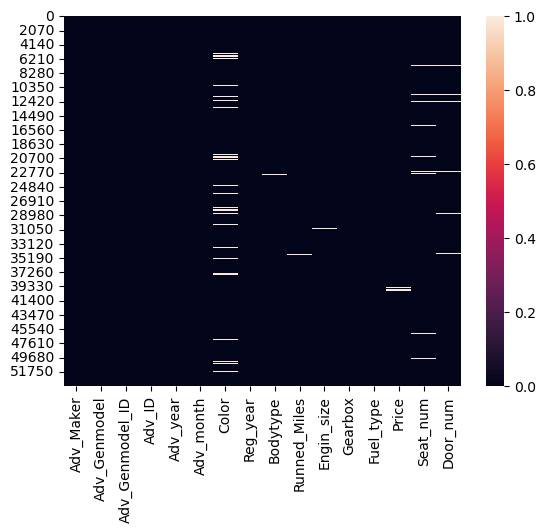

In [4]:
df_ads = sprk_session.read.csv('car_tables/Ad_table.csv', header=True, schema=schema_ads)

pd_df_ads= df_ads.sample(0.2, 4).toPandas()
sns.heatmap(pd_df_ads.isnull())

There are nulls in several columns, we could drop if there are features important for analysis or ml features.

<AxesSubplot:>

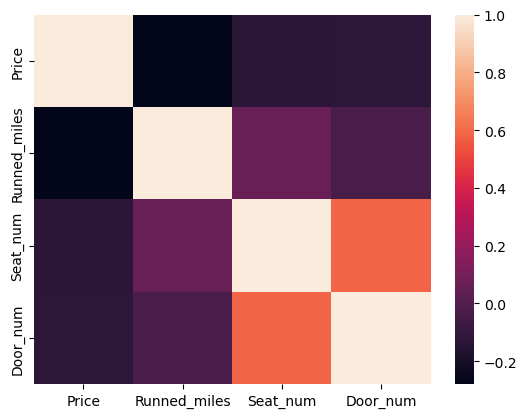

In [6]:
pd_df_ads=df_ads.select(['Price', 'Engin_size', 'Runned_miles', 'Seat_num','Door_num']).sample(0.2).toPandas()
sns.heatmap(pd_df_ads.corr())

Searching if there are correlations with the feature "devaluation per year" that we create joining with entry_price